In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("houses.csv")
df.head()

,Area,Bedrooms,Location,Price
0,1360,2,Urban,10998707
1,4272,3,Urban,34199426
2,3592,1,Urban,28695658
3,966,6,Urban,8444717
4,4926,1,Suburban,24865588


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.dropna()

,Area,Bedrooms,Location,Price
0,1360,2,Urban,10998707
1,4272,3,Urban,34199426
2,3592,1,Urban,28695658
3,966,6,Urban,8444717
4,4926,1,Suburban,24865588
...,...,...,...,...
995,3261,4,Urban,26549174
996,3179,2,Urban,25581333
997,2606,1,Suburban,13159328
998,4723,5,Rural,14697168


In [ ]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

In [ ]:
df.head()

,Area,Bedrooms,Price,Location_Suburban,Location_Urban
0,1360,2,10998707,False,True
1,4272,3,34199426,False,True
2,3592,1,28695658,False,True
3,966,6,8444717,False,True
4,4926,1,24865588,True,False


In [ ]:
X = df[['Area', 'Bedrooms', 'Location_Suburban', 'Location_Urban']]
y = df['Price']

In [ ]:
model = LinearRegression()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(mse_scores)

print(f"R2 Scores : {np.round(r2_scores, 4)}")
print(f"MAE Scores : {np.round(mae_scores, 4)}")
print(f"MSE Scores : {np.round(mse_scores, 2)}")
print(f"RMSE Scores : {np.round(rmse_scores, 4)}")

R2 Scores : [0.9397 0.9263 0.9344 0.9431 0.9271]
MAE Scores : [2013236.7766 2067358.8409 2085492.9338 1966888.5958 2182493.9136]
MSE Scores : [6.14662566e+12 6.53845087e+12 6.63787026e+12 6.03067497e+12
 7.31122115e+12]
RMSE Scores : [2479238.927  2557039.4743 2576406.463  2455743.2628 2703926.9868]


In [ ]:
print(f"AVG R2 Score : {np.round(r2_scores.mean(), 4)}")
print(f"AVG MAE Score : {np.round(mae_scores.mean(), 4)}")
print(f"AVG MSE Score : {np.round(mse_scores.mean(), 4)}")
print(f"AVG RMSE Score : {np.round(rmse_scores.mean(), 4)}")

AVG R2 Score : 6532968583163.592
AVG MAE Score : 2063094.2121
AVG MSE Score : 6532968583163.592
AVG RMSE Score : 2554471.0228


In [ ]:
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
print(f"R2 Score : {np.round(r2_score(y, y_pred), 4)}")
print(f"MAE Score : {np.round(mean_absolute_error(y, y_pred), 4)}")
print(f"MSE Score : {np.round(mean_squared_error(y, y_pred), 4)}")
print(f"RMSE Score : {np.round(np.sqrt(mean_squared_error(y, y_pred)), 4)}")

R2 Score : 0.9355
MAE Score : 2048638.8414
MSE Score : 6439128947292.67
RMSE Score : 2537543.8809


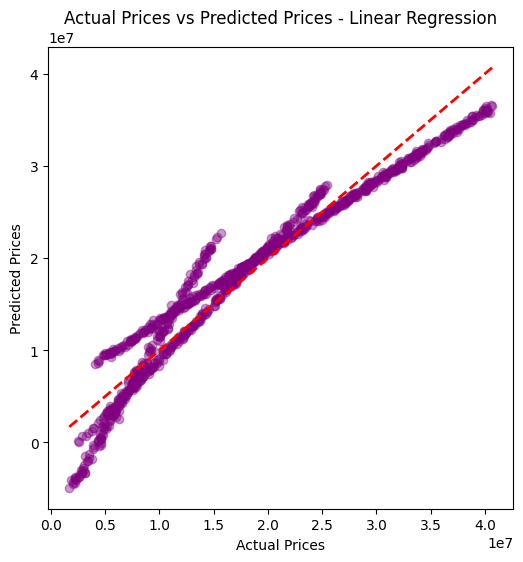

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.4, color="purple")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices - Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.show()